# Entire Pipeline

Install sdia stats and tools in same env before running this notebook

In [1]:
from silac_dia_tools.pipeline_refactored.pipeline import Pipeline as pileline
from sdia_stats.preprocessing import imputation 
from sdia_stats.preprocessing import normalize_samples
from sdia_stats.preprocessing import filter_contams_and_non_valid_rows
from sdia_stats.qc import normalization_qc
from sdia_stats.statistics import ttest
from sdia_stats.visualization.interpret_ttest_results import loop_and_plot_results
import pandas as pd
import os
os.environ['OUTDATED_IGNORE'] = '1'

C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\pkg_resources\__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\pkg_resources\__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. 

## Process report.tsv

In [2]:
path = 'G:/My Drive/Data/data/240112 poc4 test/20240314 adapted pipeline/H/'
meta = 'G:/My Drive/Data/data/240112 poc4 test/20240314 adapted pipeline/H/meta.csv'

In [3]:
normalization_groups = {'control': ['DFO','FAC']
              }
ttest_groups = {
    "FAC vs control": ('FAC','control'),
    "DFO vs control": ('DFO','control')
    
    }

In [8]:
meta = 'G:/My Drive/Data/data/20240410 SRP AID/meta.csv'
path = 'G:/My Drive/Data/data/20240410 SRP AID/'

In [ ]:
normalization_groups = {'54-': ['54+'], 
          '68-':['68+'],
          '72-':['72+']
              }
ttest_groups = {
    "54": ('54+','54-'),
    "68": ('68+','68-'),
    "72": ('72+','72-')
    
    }

### H ref normalization

In [9]:
pipeline = pileline( f'{path}', 'test_params.json', contains_reference = True, method = 'dynamic_dia_sis', pulse_channel="M", meta='meta.csv')
pipeline.execute_pipeline()


Metadata added, looking for the following file: meta.csv
CSV file 'meta.csv' found in G:/My Drive/Data/data/20240410 SRP AID/
Beginning import report.tsv


Estimated loading of report.tsv based on file size:  96%|█████████████▍| 21/21.902557805555553 [01:20<00:03,  3.87s/it]C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\tqdm\std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Estimated loading of report.tsv based on file size: 26it [01:37,  3.77s/it]                                            


Finished import
Time taken for import: 98.15552735328674 seconds
Formatting SILAC channels
Calculating SILAC ratios based on Ms1.Translated and Precursor.Translated
Rolling up to protein level


Computing protein level ratios for each run: 100%|█████████████████████████████████████| 18/18 [00:29<00:00,  1.65s/it]


Calculating adjusted intensities using reference
Calculating adjusted intensities using reference
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/protein_groups
Outputing normalized protein intensities to G:/My Drive/Data/data/20240410 SRP AID//protein_groups
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/protein_groups
Outputing normalized protein intensities to G:/My Drive/Data/data/20240410 SRP AID//protein_groups
Time taken to generate protein groups: 47.6434645652771 seconds
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/preprocessing
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports


# dynamic silac

In [3]:
pipeline = pileline( f'{path}', 'test_params.json', contains_reference = False, method = 'dynamic_silac', pulse_channel="M", meta='meta.csv')
pipeline.execute_pipeline()

Metadata added, looking for the following file: meta.csv
CSV file 'meta.csv' found in G:/My Drive/Data/data/20240410 SRP AID/
Beginning import report.tsv


Estimated loading of report.tsv based on file size:  96%|█████████████▍| 21/21.902557805555553 [01:14<00:03,  3.57s/it]C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\tqdm\std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Estimated loading of report.tsv based on file size: 26it [01:31,  3.52s/it]                                            


Finished import
Time taken for import: 91.77735948562622 seconds
Calculating SILAC ratios based on Ms1.Translated and Precursor.Translated
Rolling up to protein level


Computing protein level ratios for each run: 100%|█████████████████████████████████████| 18/18 [00:16<00:00,  1.10it/s]


Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/dlfq
Starting directLFQ analysis.
reformatting input file, for large files this might take a while.


2024-04-21 14:41:48,787 - directlfq.utils - INFO - using input type diann_precursors


Performing sample normalization.


2024-04-21 14:41:58,512 - directlfq.protein_intensity_estimation - INFO - 7178 lfq-groups total


Estimating lfq intensities.


2024-04-21 14:42:03,660 - directlfq.protein_intensity_estimation - INFO - lfq-object 0
2024-04-21 14:42:05,025 - directlfq.protein_intensity_estimation - INFO - lfq-object 100
2024-04-21 14:42:08,242 - directlfq.protein_intensity_estimation - INFO - lfq-object 200
2024-04-21 14:42:10,672 - directlfq.protein_intensity_estimation - INFO - lfq-object 300
2024-04-21 14:42:12,550 - directlfq.protein_intensity_estimation - INFO - lfq-object 400
2024-04-21 14:42:14,925 - directlfq.protein_intensity_estimation - INFO - lfq-object 500
2024-04-21 14:42:17,074 - directlfq.protein_intensity_estimation - INFO - lfq-object 600
2024-04-21 14:42:19,255 - directlfq.protein_intensity_estimation - INFO - lfq-object 700
2024-04-21 14:42:21,639 - directlfq.protein_intensity_estimation - INFO - lfq-object 800
2024-04-21 14:42:23,453 - directlfq.protein_intensity_estimation - INFO - lfq-object 900
2024-04-21 14:42:25,220 - directlfq.protein_intensity_estimation - INFO - lfq-object 1000
2024-04-21 14:42:27,12

Writing results files.
Analysis finished!
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/protein_groups
Time taken to generate protein groups: 198.845299243927 seconds
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/preprocessing
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports


# QC norm vs unnorm

C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  contaminations_path = pkg_resources.resource_filename(
2024-04-23 10:15:11,379 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  contaminations_path = pkg_resources.resource_filename(
2024-04-23 10:15:11,415 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfiel

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples 

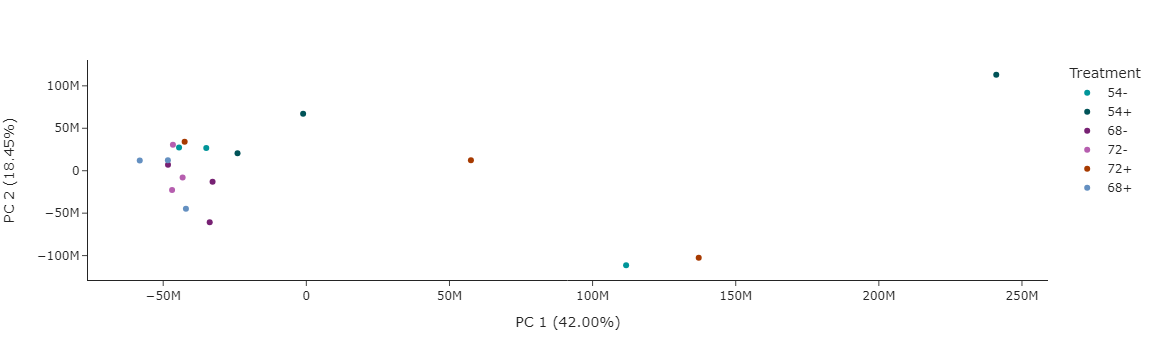

NSP


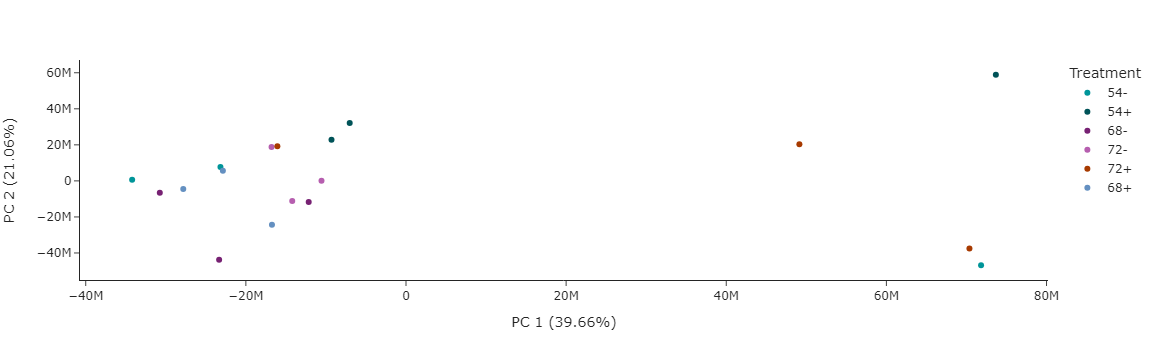

Heavy channel


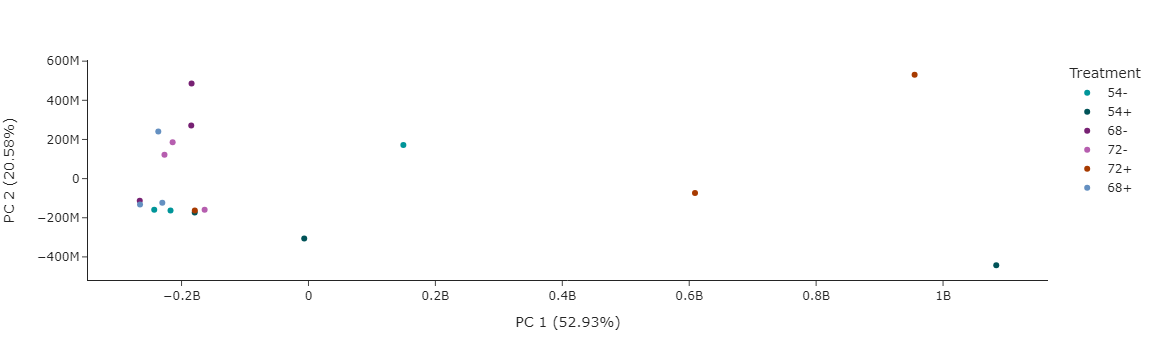

C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:12,952 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:12,982 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\minicon

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples 

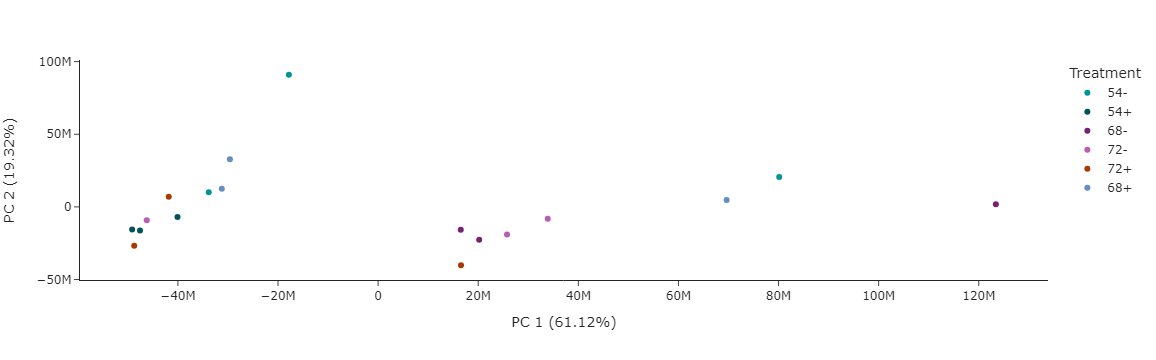

NSP


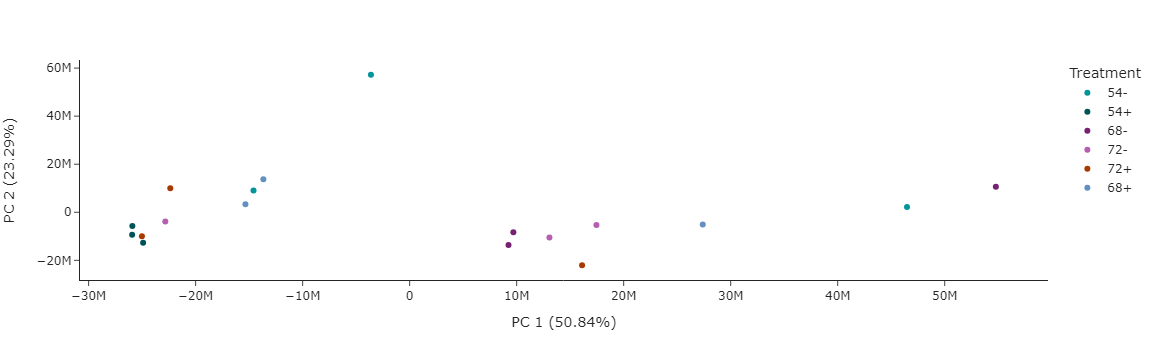

Heavy channel


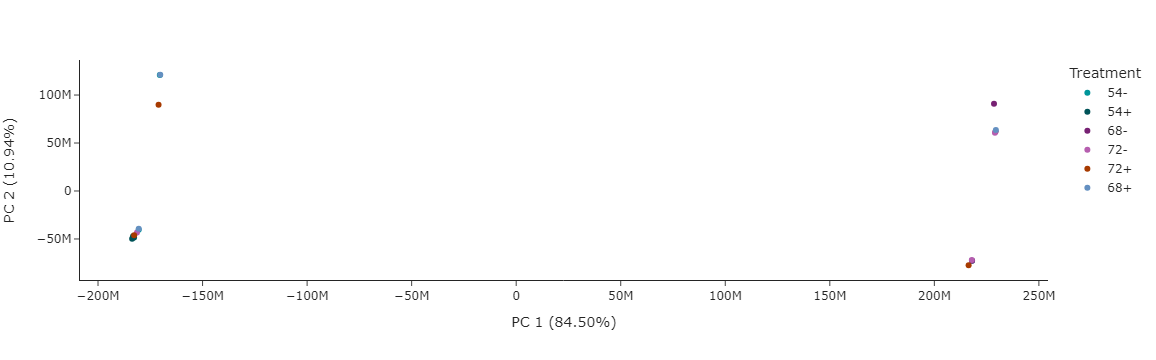

C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:13,925 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:13,970 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full


DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
Light


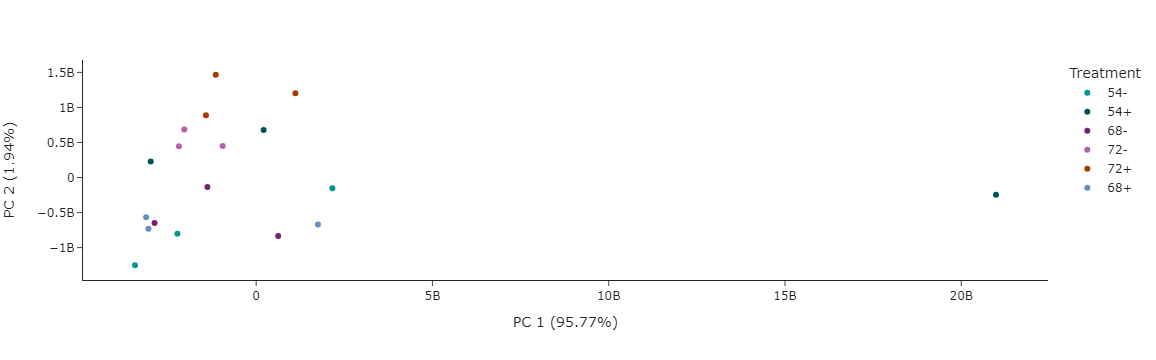

NSP


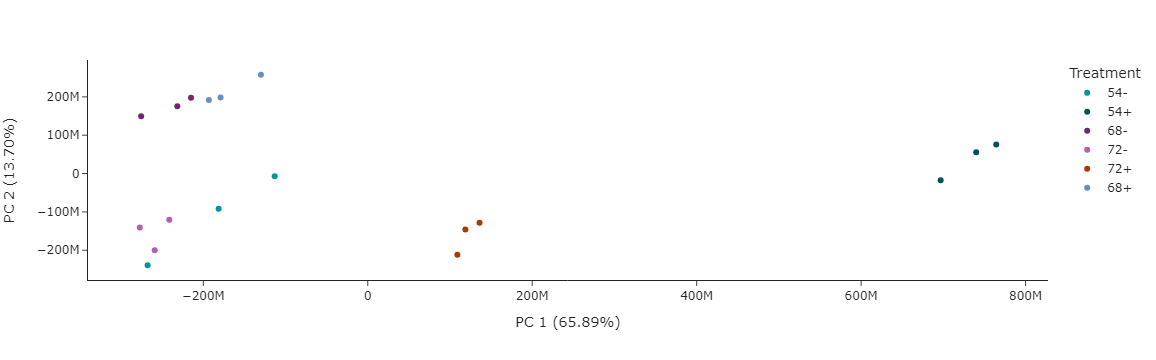

In [10]:
normalization_qc.pca(path,meta, '_unnorm')
normalization_qc.pca(path,meta, '')
normalization_qc.pca(path,meta, '_lfq')


C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:14,576 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:14,614 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\minicon

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples 

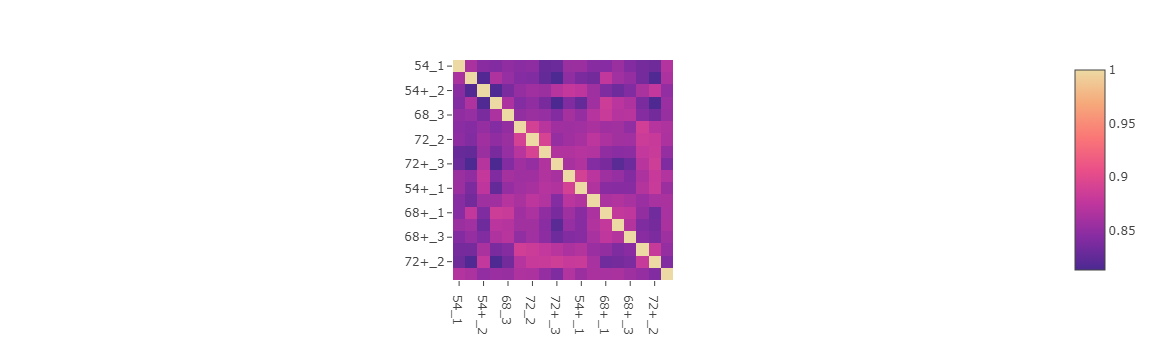

NSP


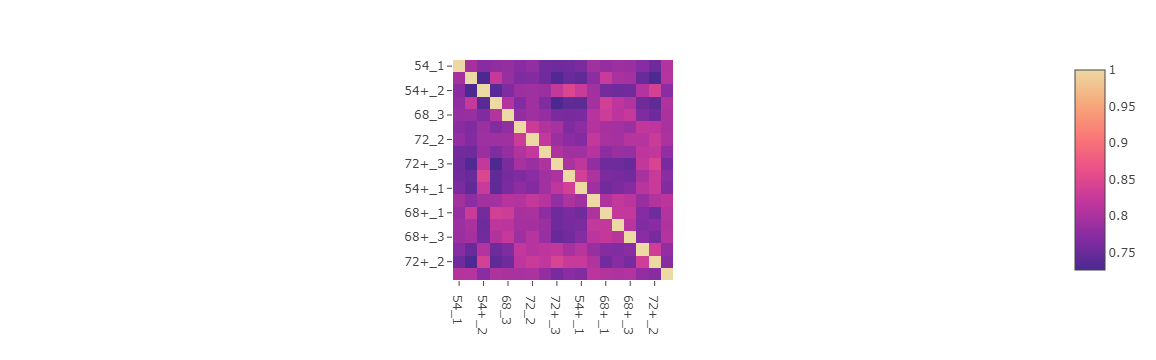

Heavy channel


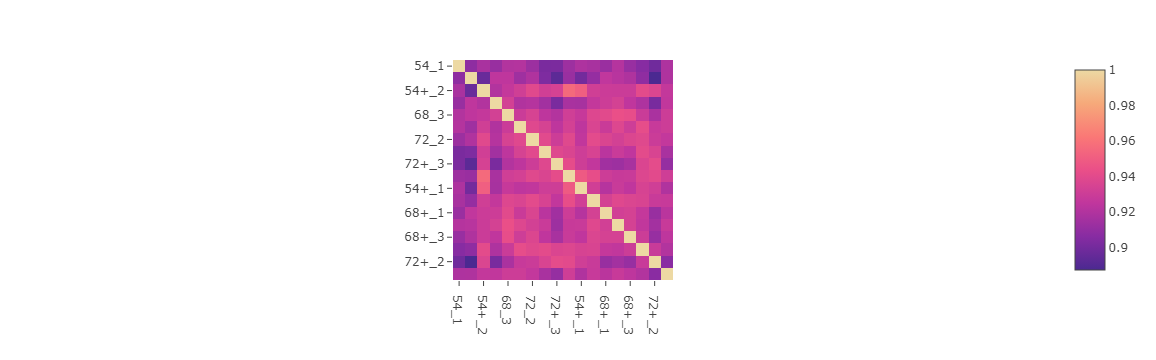

C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:15,074 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:15,103 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\minicon

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples 

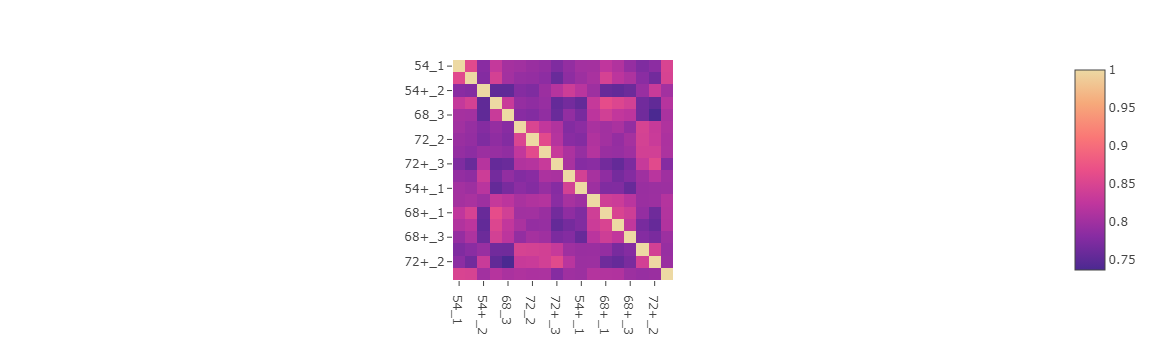

NSP


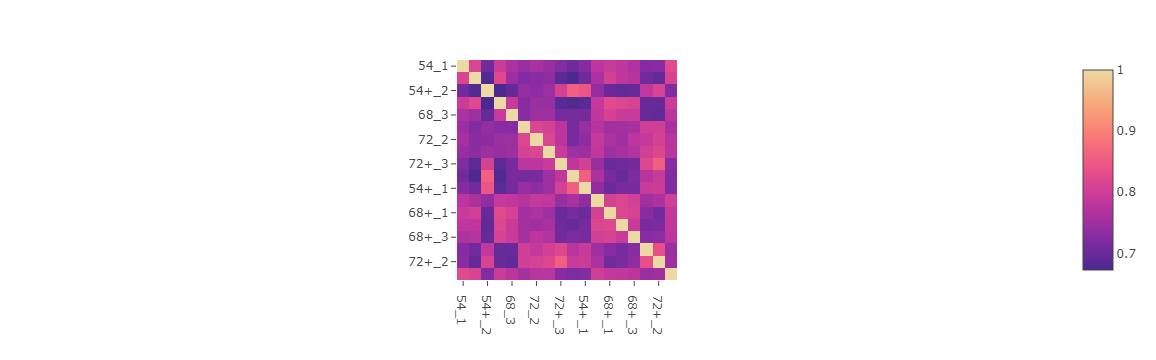

Heavy channel


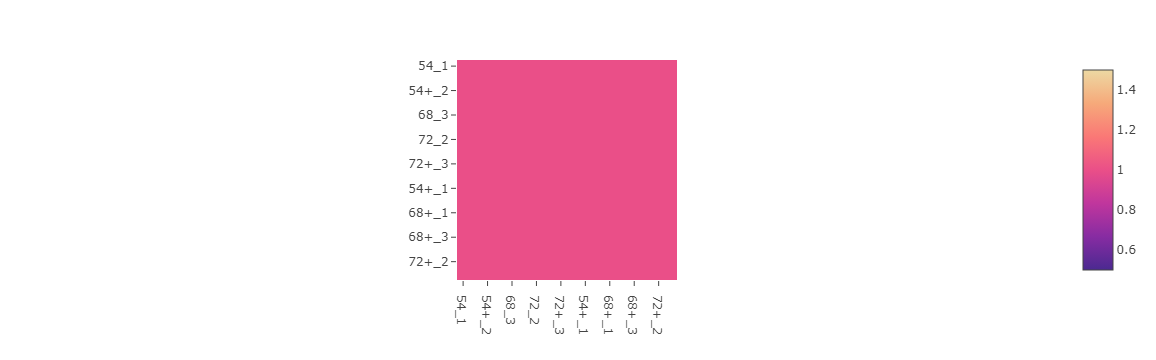

C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:15,575 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-23 10:15:15,602 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full


DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
Light


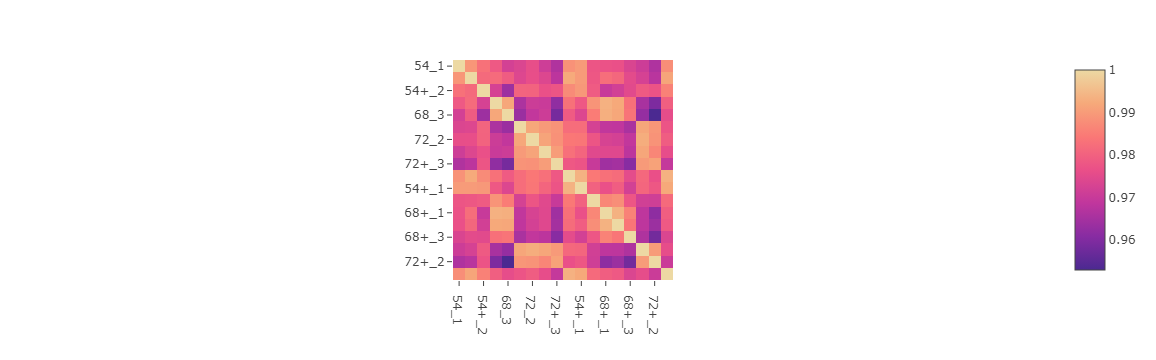

NSP


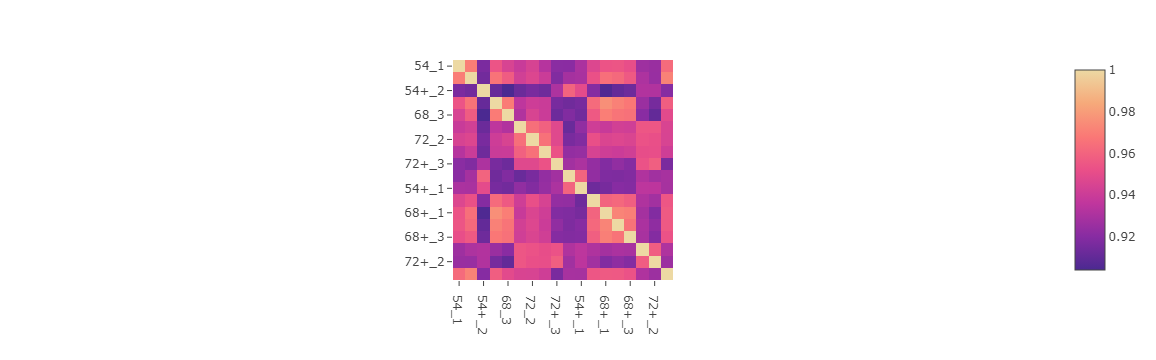

In [11]:
normalization_qc.correlation(path,meta, '_unnorm')
normalization_qc.correlation(path,meta, '')
normalization_qc.correlation(path,meta, '_lfq')

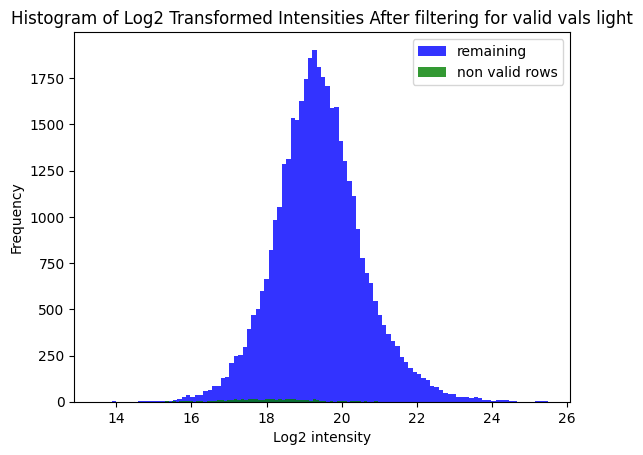

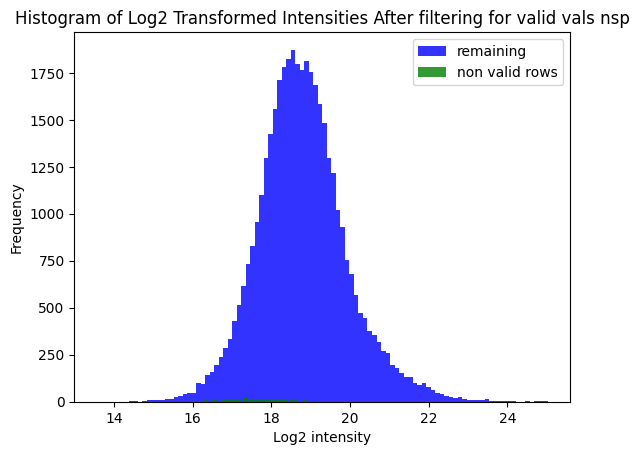

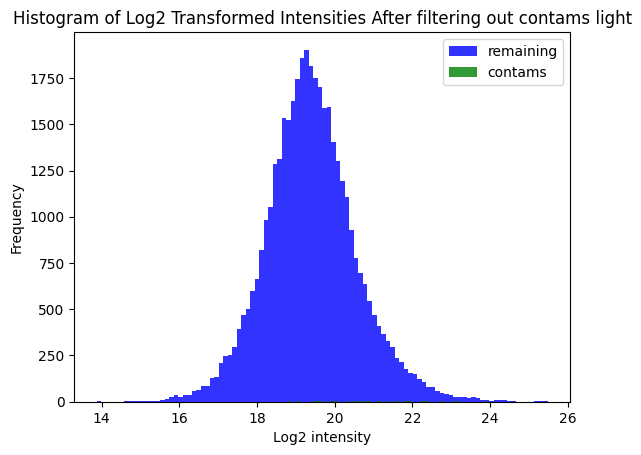

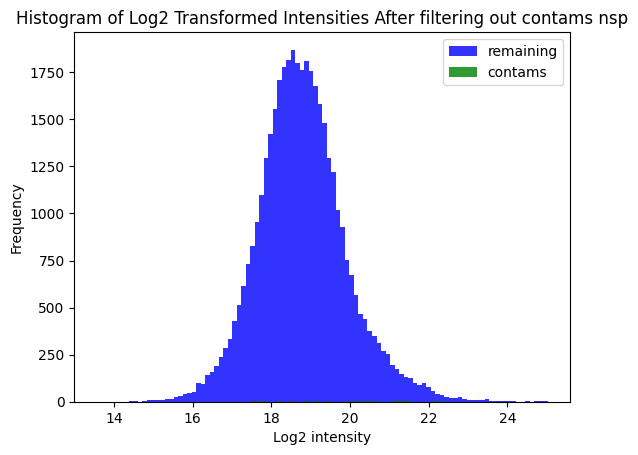

Folder reports already exists at G:/My Drive/Data/data/240112 poc4 test/20240314 adapted pipeline/H//protein_groups/../statistics


In [4]:
filter_contams_and_non_valid_rows.filter_protein_intensities(path, meta)

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


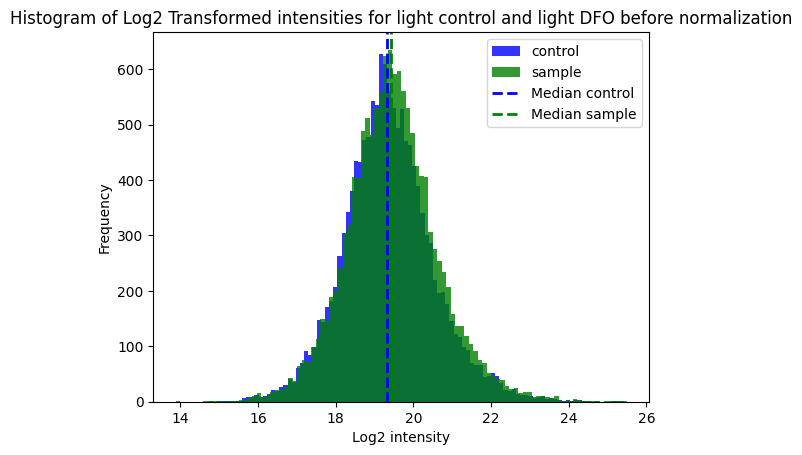

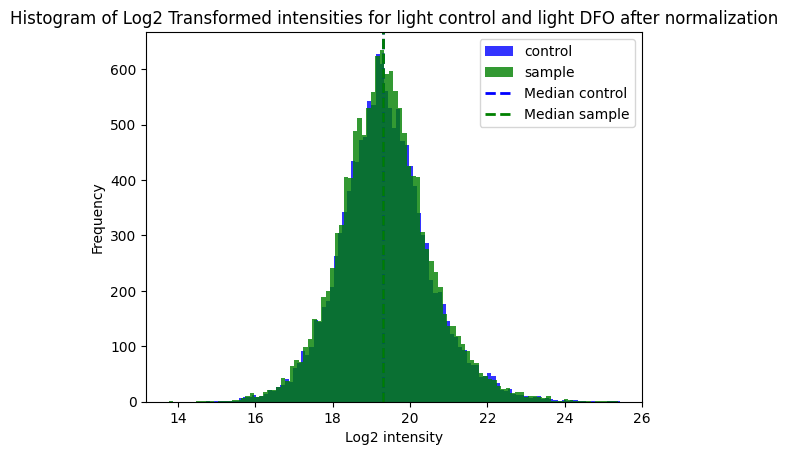

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


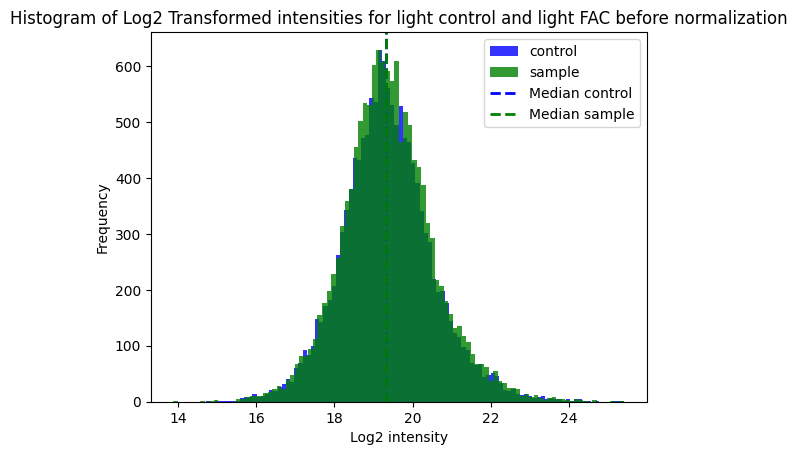

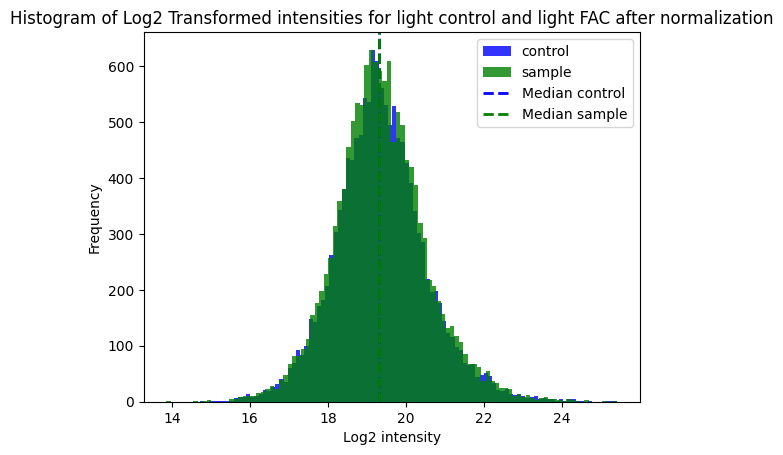

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


[('control', 'DFO', -0.11592821511744233), ('control', 'FAC', -0.02083555124438874)]


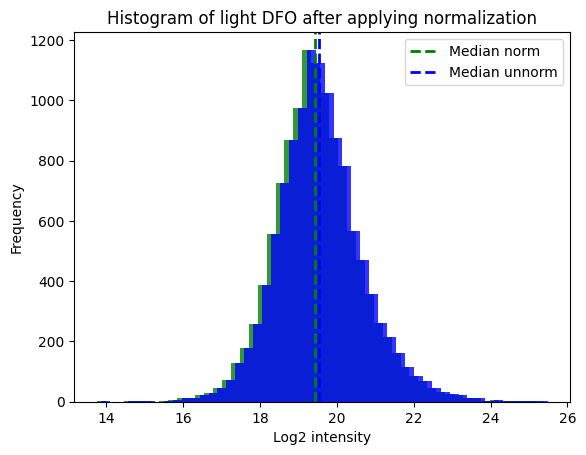

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


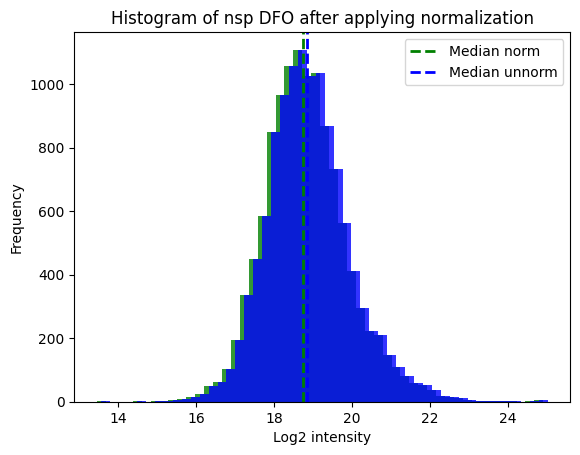

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


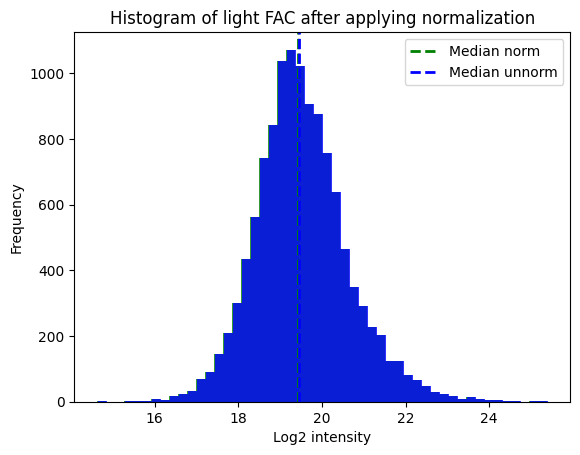

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


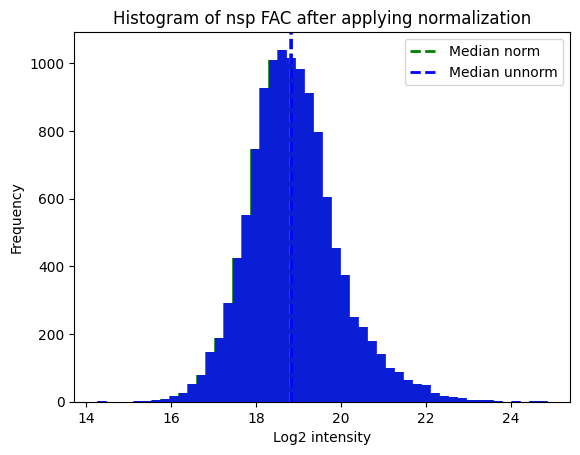

Folder reports already exists at G:/My Drive/Data/data/240112 poc4 test/20240314 adapted pipeline/H//statistics/normalized


In [5]:

normalize_samples.main(path, normalization_groups, meta)


import data
Subset data
preprocess data
Filter for valid vals


ic| control_samples: ['control_I', 'control_II', 'control_III']
ic| subset: 'all samples'
ic| data:       control_I  control_II  control_III      DFO_I     DFO_II    DFO_III  \
          0     19.552801   18.702254    19.626873  19.416711  19.730643  19.319843   
          3     19.347304   19.118423    19.166288  19.123450  19.472459  19.278829   
          4     18.911445   19.092264    18.921029  19.064806  19.024260  19.176350   
          6     18.881109   18.410485    19.166683  19.132616  18.975411  18.800839   
          10    18.458697   18.160880    17.923566  18.393033  18.416845  18.528651   
          ...         ...         ...          ...        ...        ...        ...   
          5276  19.495654   18.683077    19.177271  19.011299  19.303391  19.290368   
          5278  18.677656   18.718835    18.647487  17.937833  18.412578  18.381860   
          5280  19.719243   19.892532    19.324299  19.462663  19.632952  19.027062   
          5284  18.927356   18.749459   

annotate df with the lowest mean value of observed proteins within each sample group per row


  18.097465  18.733786  
          ...         ...        ...        ...  
          5276  19.366740  19.801633  19.938734  
          5278  18.115813  18.315399  18.406382  
          5280  20.102048  19.607389  19.476635  
          5284  18.355597  18.716924  19.031682  
          5285  19.550071  19.604915  19.888311  
          
          [3527 rows x 9 columns]
ic| mu: 19.62261467523518
ic| std: 1.05841672448859
ic| global_mu: 17.71746457115572
ic| global_std: 0.317525017346577


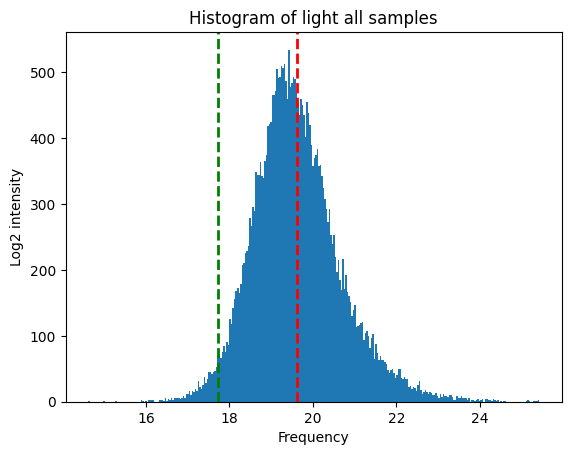

ic| subset: 'control samples'
ic| data:       control_I  control_II  control_III
          0     18.750804   18.171623    18.680566
          3     18.288832   17.991137    18.102378
          4     18.243477   17.893112    17.968791
          6     18.080639   17.858006    18.582342
          7     19.123604   18.343374    18.710824
          ...         ...         ...          ...
          5278  18.949885   18.739381    18.904933
          5279  17.775189   16.301216    15.745549
          5280  18.215210   18.163045    18.511167
          5284  18.534018   17.965241    18.345972
          5285  18.802546   18.711690    18.950756
          
          [4002 rows x 3 columns]
ic| mu: 18.89565091958
ic| std: 1.0737028935076935
ic| global_mu: 16.96298571126615
ic| global_std: 0.32211086805230804


annotate df with the lowest mean value of observed proteins within each sample group per row


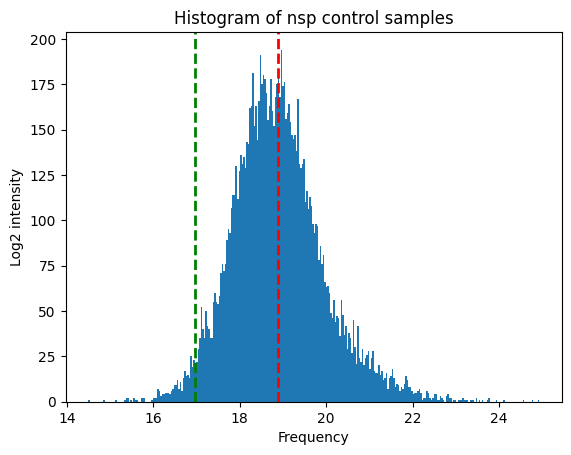

preform imputation
Inspect df after all annotation
Inspect df after all annotation


ic| nan_mask:       Protein.Group  control_I  control_II  control_III  DFO_I  DFO_II  \
              0             False      False       False        False  False   False   
              1             False      False       False         True  False   False   
              3             False      False       False        False  False   False   
              4             False      False       False        False  False   False   
              6             False      False       False        False  False   False   
              ...             ...        ...         ...          ...    ...     ...   
              5281          False       True       False        False  False   False   
              5282          False      False       False         True   True    True   
              5283          False       True       False         True  False   False   
              5284          False      False       False        False  False   False   
              5285          Fals

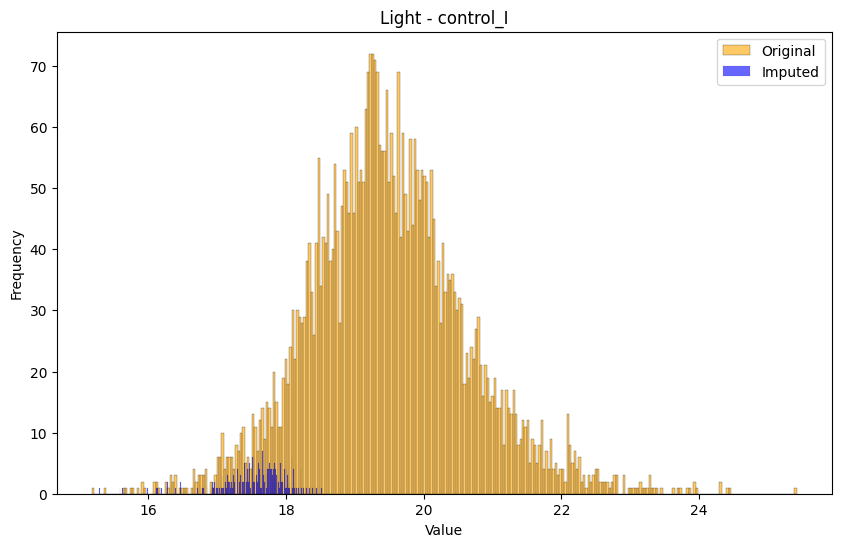

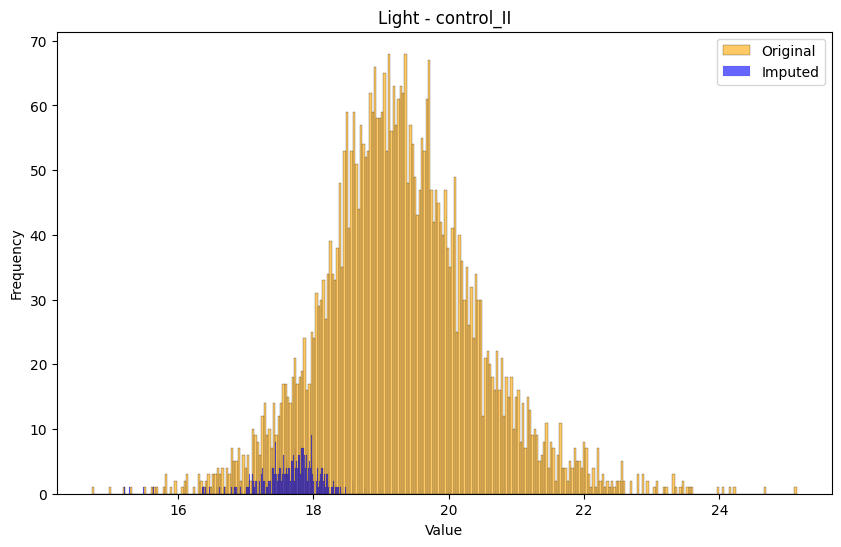

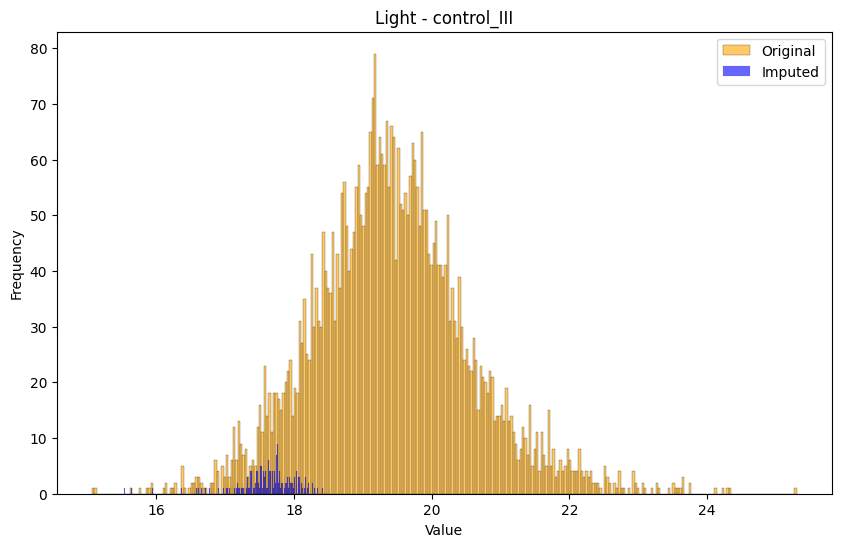

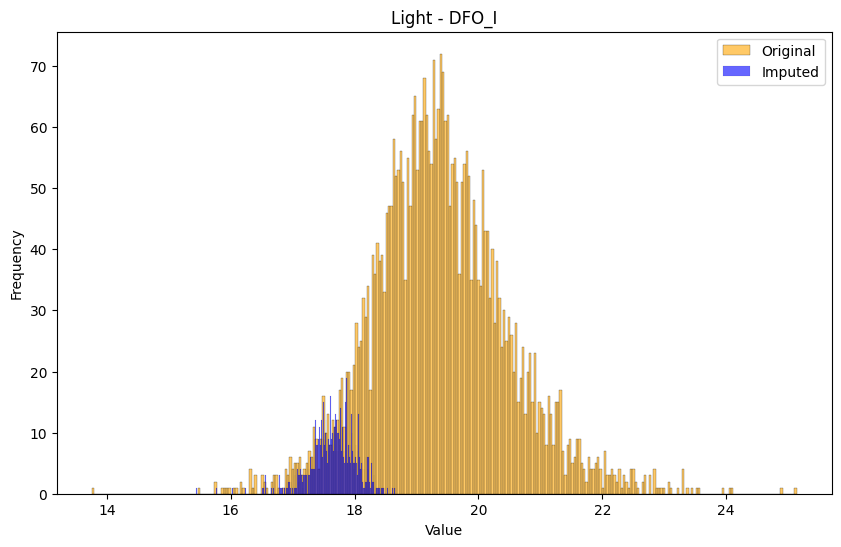

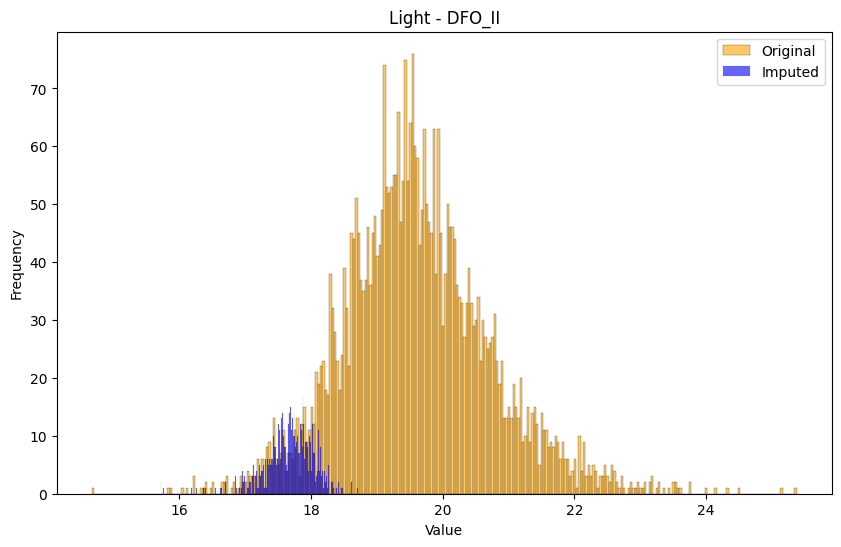

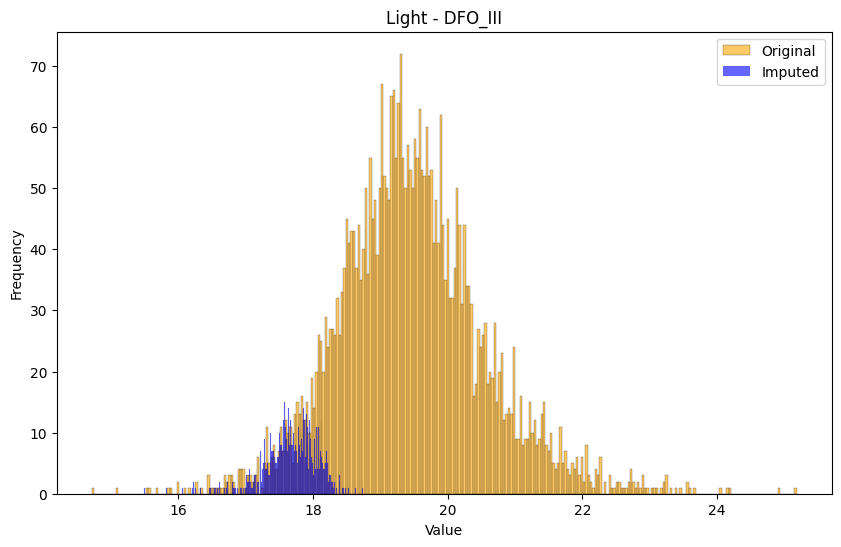

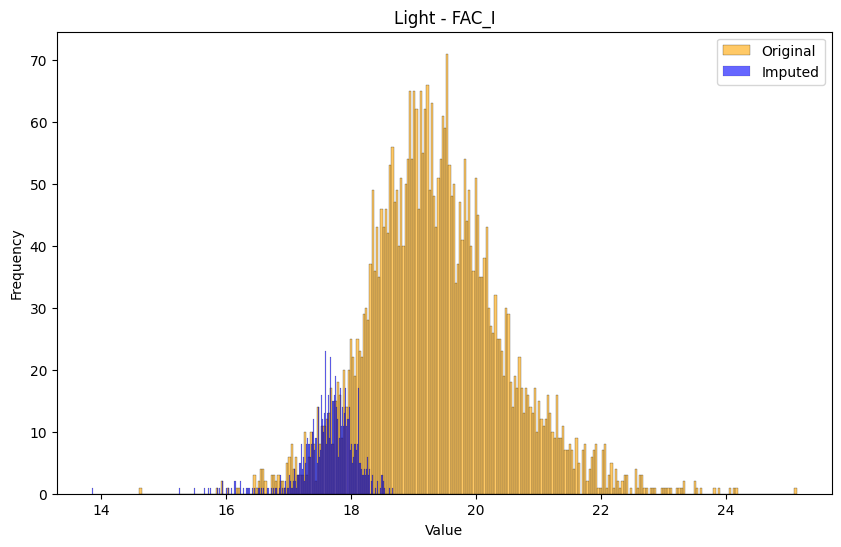

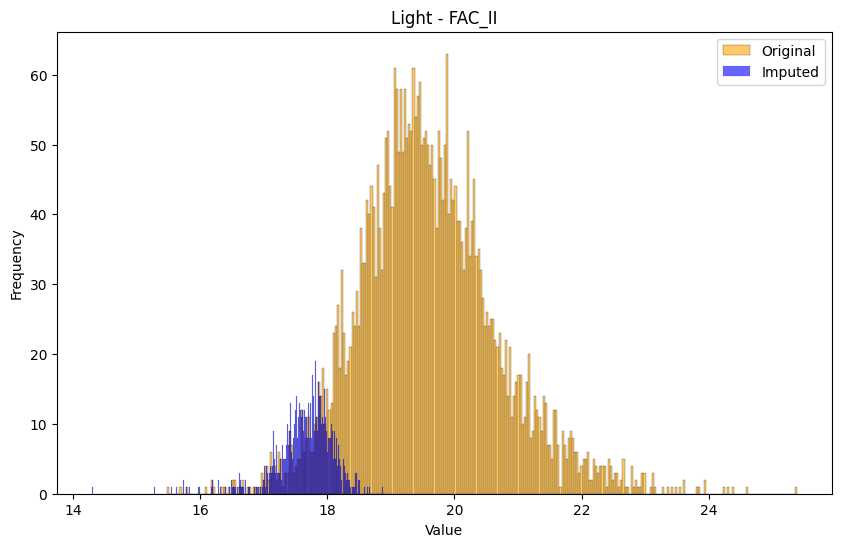

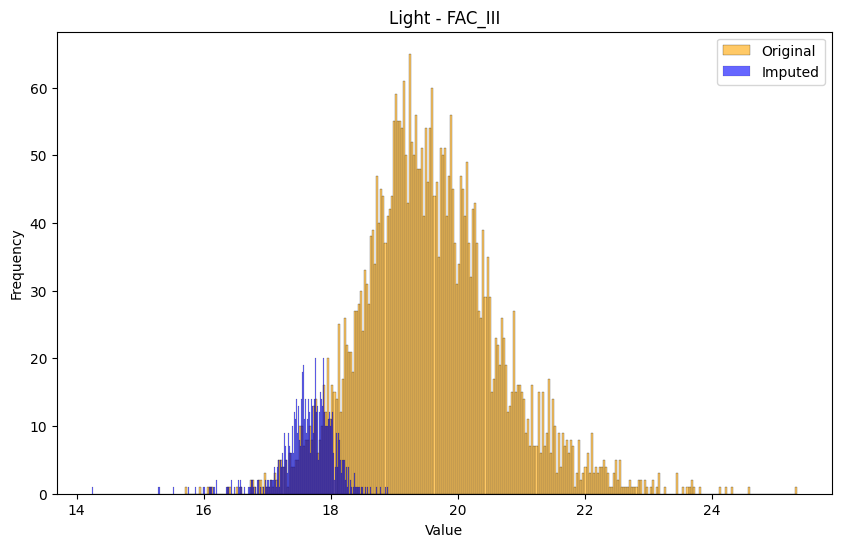

ic| nan_mask:       Protein.Group  control_I  control_II  control_III  DFO_I  DFO_II  \
              0             False      False       False        False  False   False   
              1             False      False       False         True  False   False   
              3             False      False       False        False  False   False   
              4             False      False       False        False  False   False   
              6             False      False       False        False  False   False   
              ...             ...        ...         ...          ...    ...     ...   
              5281          False       True       False        False  False   False   
              5282          False      False       False         True   True    True   
              5283          False       True       False         True  False   False   
              5284          False      False       False        False  False   False   
              5285          Fals

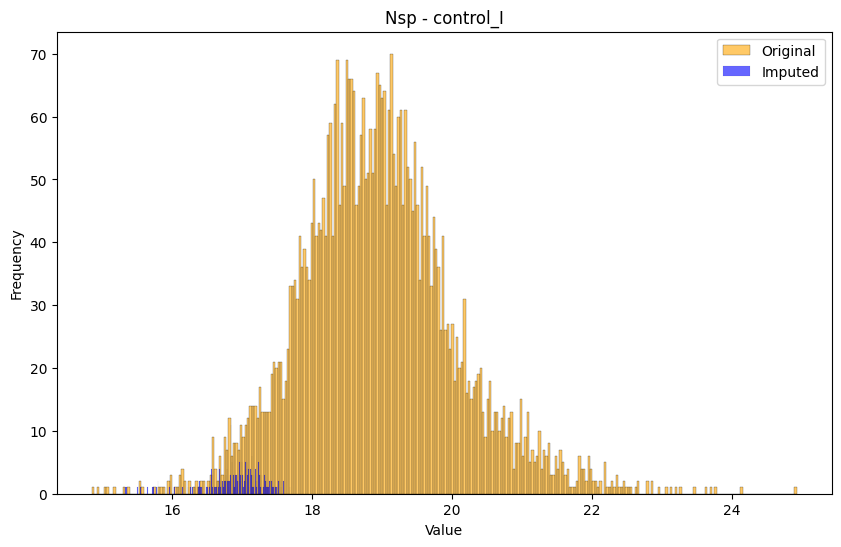

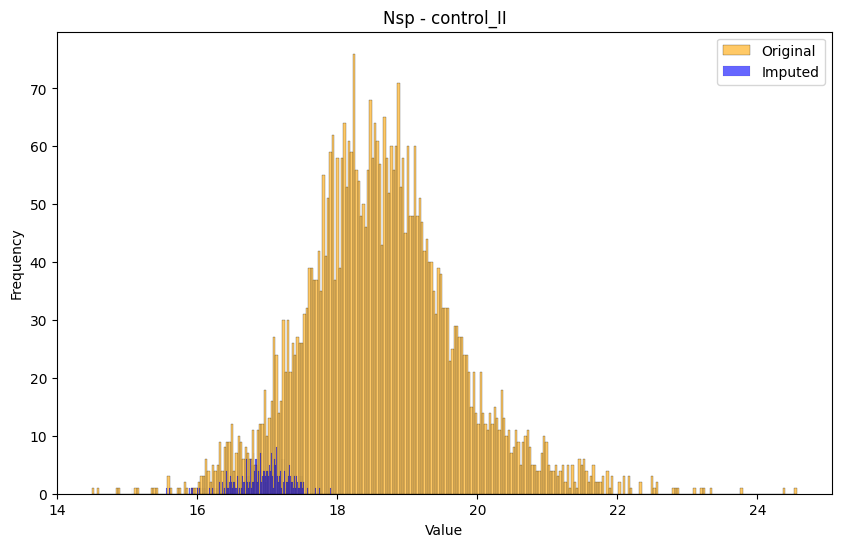

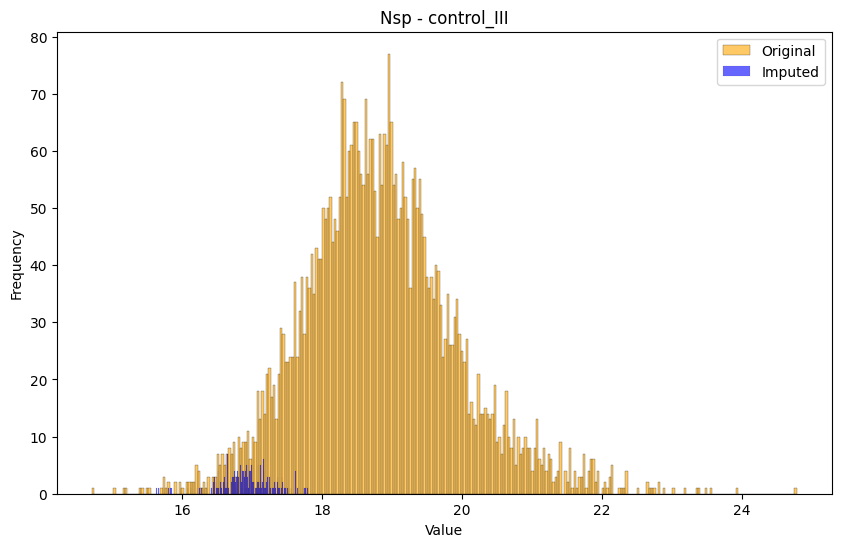

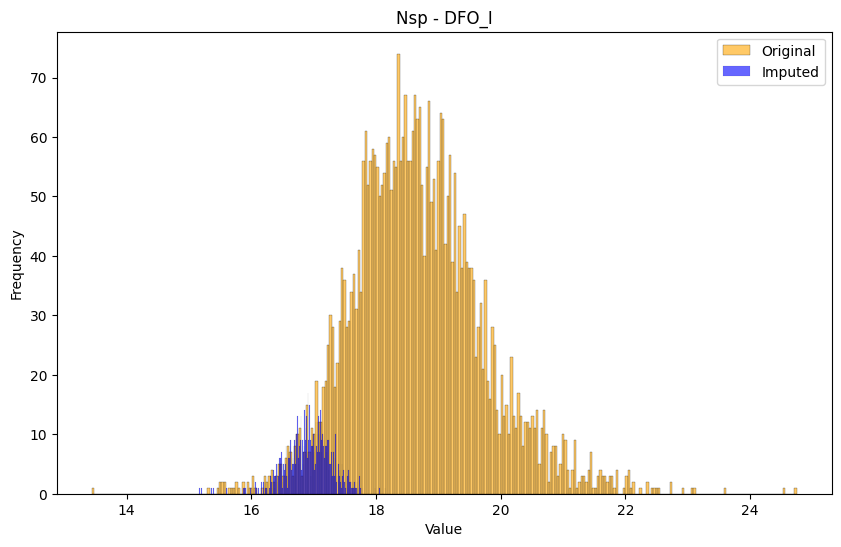

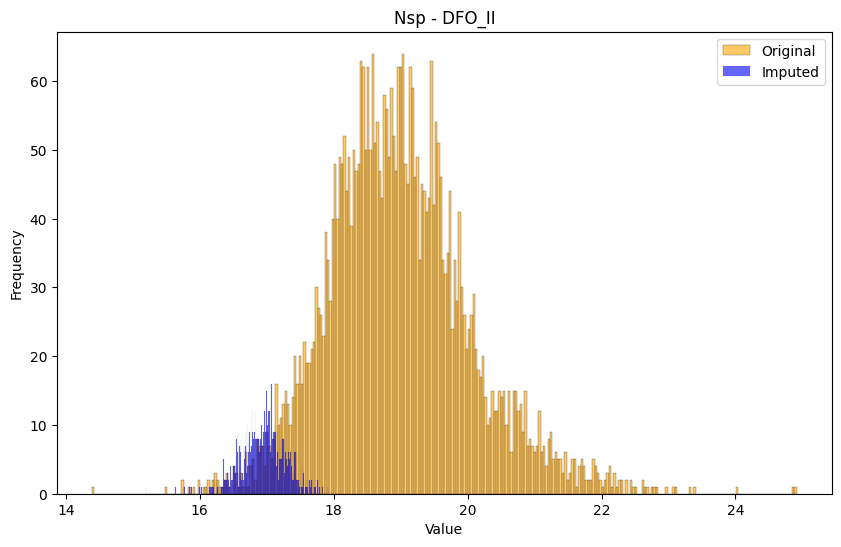

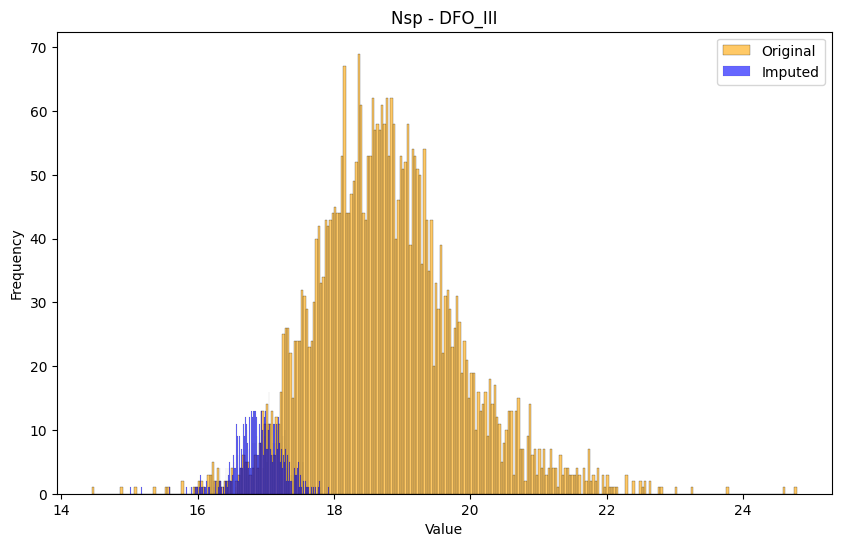

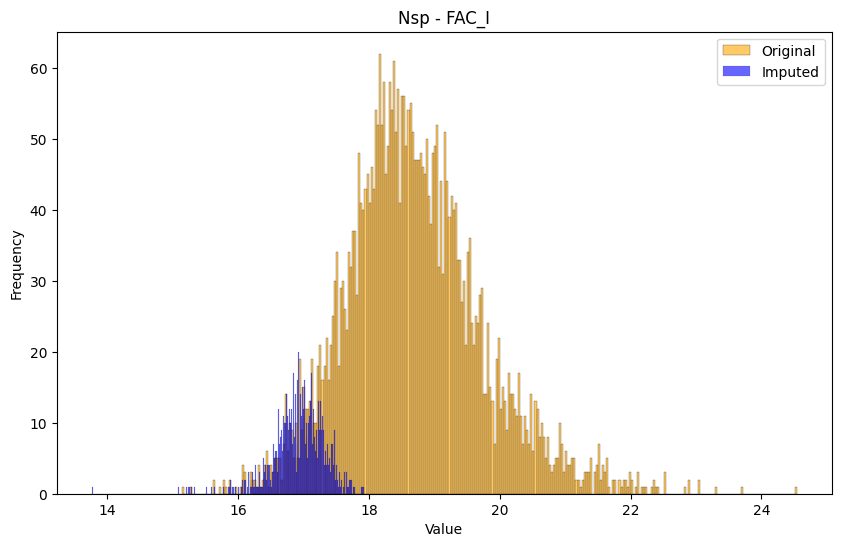

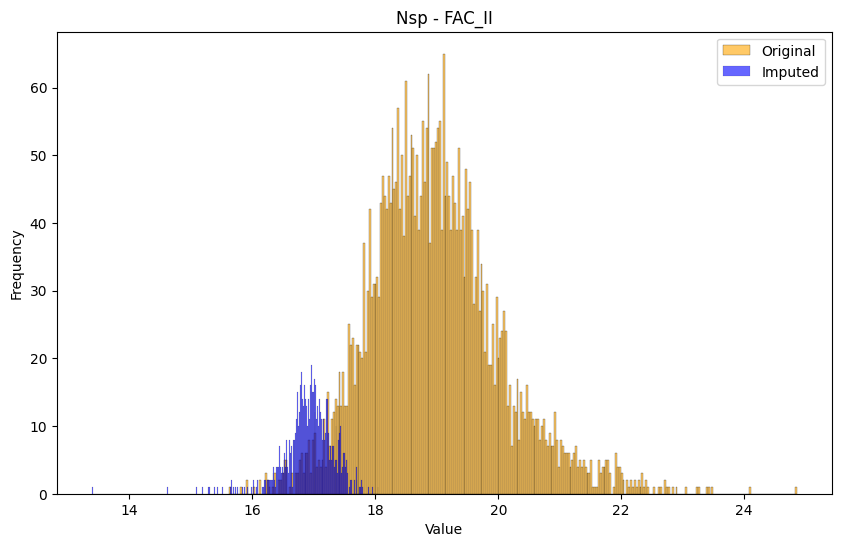

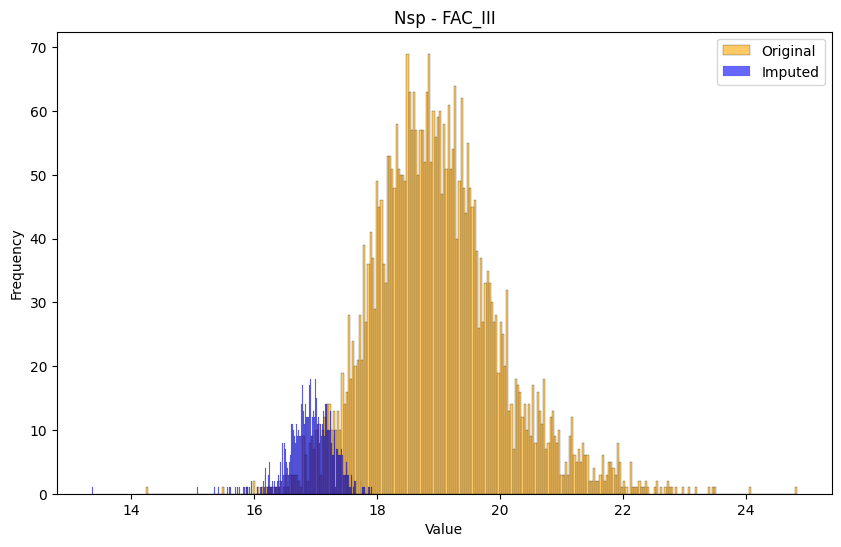

Folder reports already exists at G:/My Drive/Data/data/240112 poc4 test/20240314 adapted pipeline/H//statistics/imputed


In [8]:

light, nsp = imputation.perform_imputation(path,normalization_groups, meta)

In [4]:
ttest.ttest(path, meta, ttest_groups)
# path = 'G:/My Drive/Data/data/20240306 eIF 5 lines/3d G3 G2/protein_groups_filtered/imputed/ttest results/'


C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  contaminations_path = pkg_resources.resource_filename(
2024-04-23 12:05:47,169 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  contaminations_path = pkg_resources.resource_filename(
2024-04-23 12:05:47,203 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfiel

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
Data has been log2-transformed.
Data has been log2-transformed.
Folder reports already exists at G:/My Drive/Data/data/240112 poc4 test/20240314 adapted pipeline/H//statistics/ttest results
Folder repor

['FAC vs control_light.csv', 'FAC vs control_nsp.csv', 'DFO vs control_light.csv', 'DFO vs control_nsp.csv', 'FAC vs control_light.png', 'FAC vs control_nsp.png', 'DFO vs control_light.png', 'DFO vs control_nsp.png']


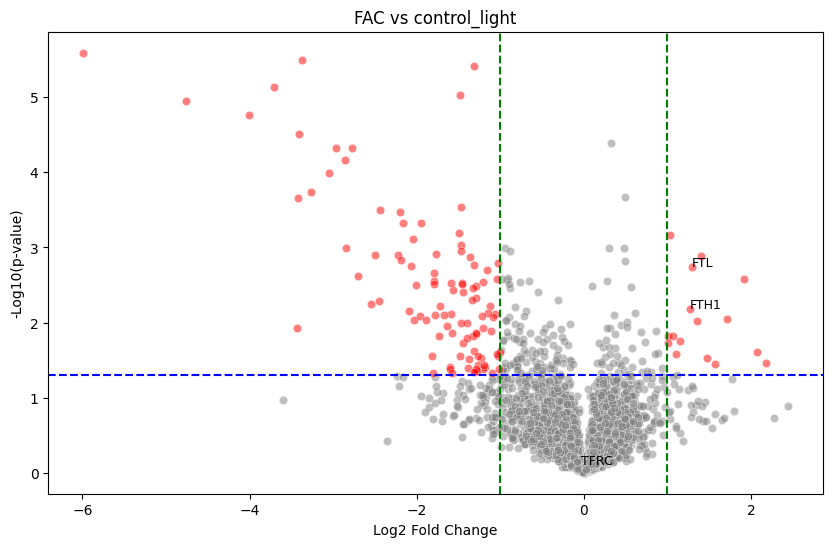

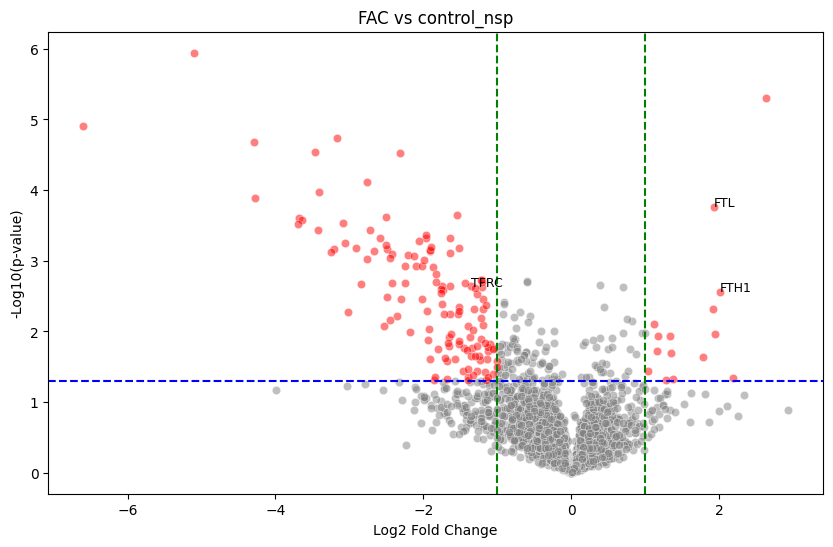

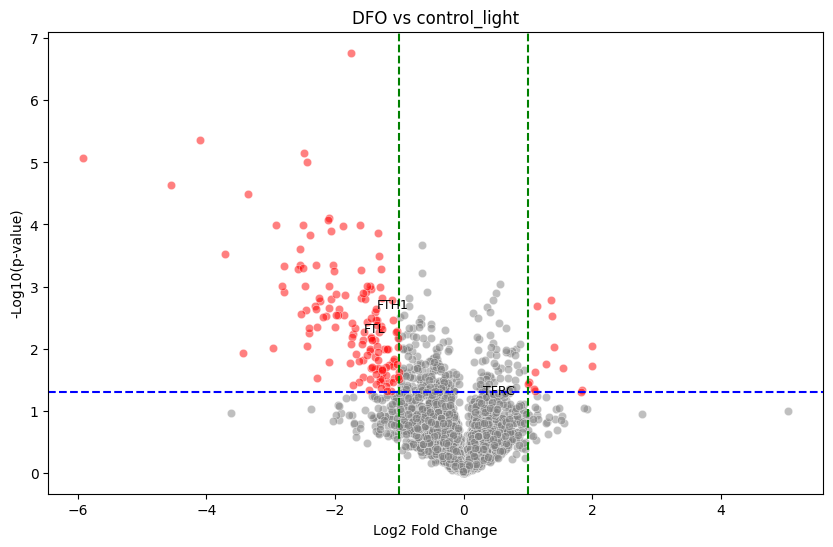

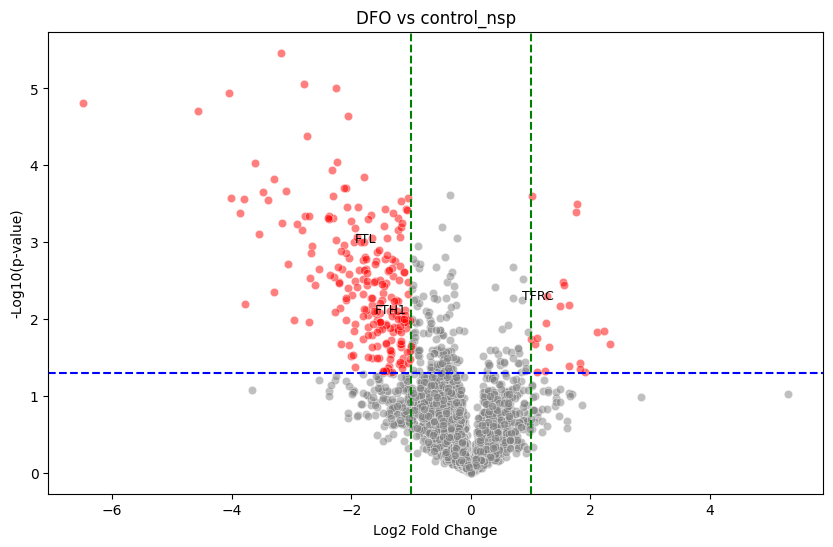

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [6]:
pois = ["SRP54", "SRP68", "SRP72"]
pois = ['FTL','FTH1', 'TFRC']
loop_and_plot_results(path, pois, interactive=False, uniprot=False)